In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters ()

In [2]:
df1 = pd.read_csv("/Users/nicolasdemuynck/Documents/Datasets/Stockpred/stocks/A.csv" , index_col='Date')

df1.head (5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


In [3]:
df2 = pd.read_csv("/Users/nicolasdemuynck/Documents/Datasets/Stockpred/stocks/AA.csv" , index_col='Date')

df2.head (5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,6.532155,6.556185,6.532155,6.532155,1.536658,55900
1962-01-03,6.532155,6.632280,6.524145,6.632280,1.560212,74500
1962-01-04,6.632280,6.664320,6.632280,6.632280,1.560212,80500
1962-01-05,6.632280,6.656310,6.616260,6.624270,1.558326,70500
1962-01-08,6.608250,6.608250,6.339915,6.408000,1.507450,93800


In [4]:
df1.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 5124 entries, 1999-11-18 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5124 non-null   float64
 1   High       5124 non-null   float64
 2   Low        5124 non-null   float64
 3   Close      5124 non-null   float64
 4   Adj Close  5124 non-null   float64
 5   Volume     5124 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 280.2+ KB


In [5]:
df2.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 14663 entries, 1962-01-02 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       14663 non-null  float64
 1   High       14663 non-null  float64
 2   Low        14663 non-null  float64
 3   Close      14663 non-null  float64
 4   Adj Close  14663 non-null  float64
 5   Volume     14663 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 801.9+ KB


In [7]:
dfA_close2020 = df1.Close[-63:]
dfA_close2020

Date
2020-01-02    85.949997
2020-01-03    84.570000
2020-01-06    84.820000
2020-01-07    85.080002
2020-01-08    85.919998
                ...    
2020-03-26    73.720001
2020-03-27    70.910004
2020-03-30    72.669998
2020-03-31    71.620003
2020-04-01    68.919998
Name: Close, Length: 63, dtype: float64

In [8]:
dfAA_close2020 = df2.Close[-63:]
dfAA_close2020

Date
2020-01-02    21.420000
2020-01-03    21.500000
2020-01-06    21.000000
2020-01-07    21.320000
2020-01-08    20.459999
                ...    
2020-03-26     6.840000
2020-03-27     6.550000
2020-03-30     6.070000
2020-03-31     6.160000
2020-04-01     6.250000
Name: Close, Length: 63, dtype: float64

Text(0.5, 1.0, 'Timeserie company A')

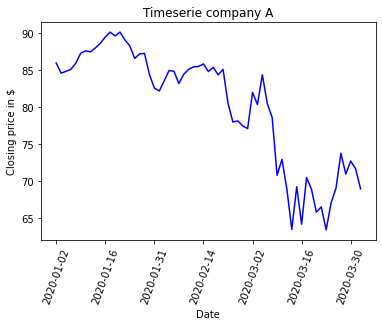

In [56]:
ax1 = dfA_close2020.plot (color = 'blue')
ax1.set_xlabel ('Date')
ax1.set_ylabel ('Closing price in $')
plt.xticks(rotation=70)
plt.title ('Timeserie company A')

Text(0.5, 1.0, 'Timeserie company AA')

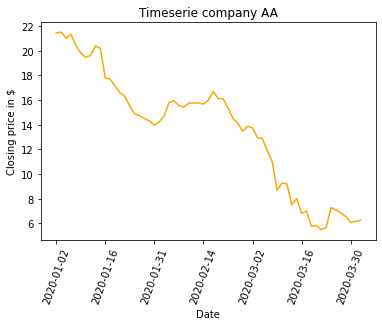

In [55]:
ax1 = dfAA_close2020.plot (color = 'orange')
ax1.set_xlabel ('Date')
ax1.set_ylabel ('Closing price in $')
plt.xticks(rotation=70)
plt.title ('Timeserie company AA')

In [19]:
pct_change1 = np.log(dfA_close2020).diff ()
pct_change1.head ()

Date
2020-01-02         NaN
2020-01-03   -0.016186
2020-01-06    0.002952
2020-01-07    0.003061
2020-01-08    0.009825
Name: Close, dtype: float64

In [20]:
pct_change2 = np.log(dfAA_close2020).diff ()
pct_change2.head ()

Date
2020-01-02         NaN
2020-01-03    0.003728
2020-01-06   -0.023530
2020-01-07    0.015123
2020-01-08   -0.041174
Name: Close, dtype: float64

In [21]:
pct_change1.dropna (inplace=True)
pct_change2.dropna (inplace=True)

In [22]:
pct_change1.describe ()

count    62.000000
mean     -0.003562
std       0.035973
min      -0.104710
25%      -0.020162
50%       0.000578
75%       0.009230
max       0.093849
Name: Close, dtype: float64

In [23]:
pct_change2.describe ()

count    62.000000
mean     -0.019867
std       0.068800
min      -0.236631
25%      -0.041898
50%      -0.012599
75%       0.014333
max       0.248567
Name: Close, dtype: float64

Text(0, 0.5, 'Frequency')

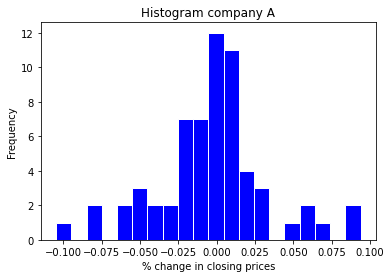

In [57]:
plt.hist(pct_change1, bins=20, color = 'b', edgecolor='w')
plt.title ('Histogram company A')
plt.xlabel('% change in closing prices')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

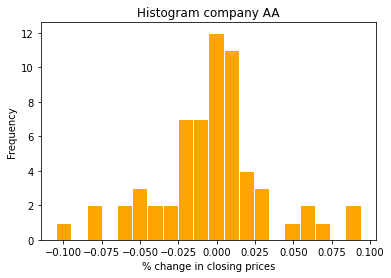

In [58]:
plt.hist(pct_change1, bins=20, color = 'orange', edgecolor='w')
plt.title ('Histogram company AA')
plt.xlabel('% change in closing prices')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

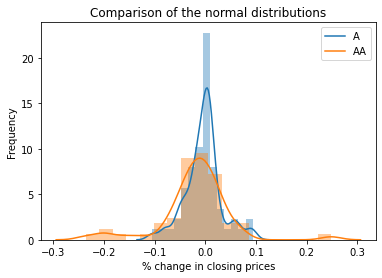

In [62]:
sns.distplot(pct_change1, kde_kws={'label': 'A'})
sns.distplot(pct_change2, kde_kws={'label': 'AA'})
plt.title ('Comparison of the normal distributions')
plt.xlabel('% change in closing prices')
plt.ylabel('Frequency')

In [33]:
pct_change_old=pd.merge(pct_change1, pct_change2, on='Date', how='left')
pct_change_old.head (5)

,Close_x,Close_y
Date,,
2020-01-03,-0.016186,0.003728
2020-01-06,0.002952,-0.023530
2020-01-07,0.003061,0.015123
2020-01-08,0.009825,-0.041174
2020-01-09,0.015590,-0.032285


In [34]:
pct_change = pct_change_old.rename(columns={'Close_x': 'Close_A', 'Close_y': 'Close_AA'})
pct_change.head (5)

,Close_A,Close_AA
Date,,
2020-01-03,-0.016186,0.003728
2020-01-06,0.002952,-0.023530
2020-01-07,0.003061,0.015123
2020-01-08,0.009825,-0.041174
2020-01-09,0.015590,-0.032285


Text(0.5, 1.0, 'Correlation between companies')

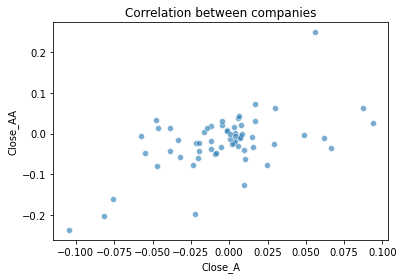

In [52]:
sns.scatterplot(pct_change['Close_A'], pct_change['Close_AA'], alpha = 0.6)
plt.title ('Correlation between companies')

In [53]:
pct_change.corr ()

,Close_A,Close_AA
Close_A,1.000000,0.557938
Close_AA,0.557938,1.000000


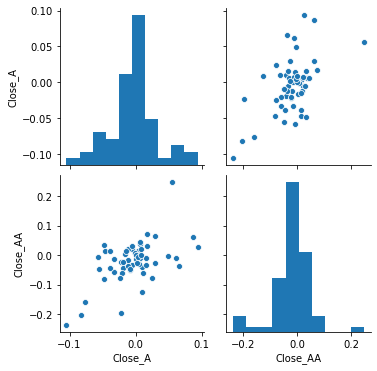

In [54]:
sns.pairplot(pct_change)